In [1]:
import numpy as np

In [2]:
import pcn_logic_eq

N =  number of training examples

m = number of input neurons

n = number of outputs

Inputs are N x m matrix

Weights are a m x n matrix

y are N x n matrix

# We test the nn with an OR function

In [3]:
data = np.array([[0,0],[0,1],[1,0],[1,1]])
targets = np.array([[0],[1],[1],[1]])
T = 5
eta = 0.25

In [4]:
p = pcn_logic_eq.pcn(data,targets)

In [5]:
p.pcntrain(data,targets,eta,T)

# We now test with a XOR function

In [6]:
targets = np.array([[0],[1],[1],[0]])

In [7]:
p.pcntrain(data,targets,0.25,15)

We see that the algorithm does not converge as an XOR function is not linearly separable. It keeps cycling between two wrong solutions.

## Test XOR function in 3D 

In [8]:
inputs = np.array([[0,0,1],[0,1,0],[1,0,0],[1,1,0]])

In [9]:
p = pcn_logic_eq.pcn(inputs,targets)

In [10]:
p.pcntrain(inputs,targets,0.25,15)

We see that the NN reaches a stable, correct output. It is always possible to separate out two classes with a linear function, provided that you project the data into the correct set of dimensions.

# We test using the pima data set

In [11]:
import pylab as pl
%matplotlib inline

In [12]:
pima = np.loadtxt('pima-indians-diabetes.data',delimiter=',')

In [13]:
np.shape(pima)

(768L, 9L)

In [14]:
pima

array([[   6.   ,  148.   ,   72.   , ...,    0.627,   50.   ,    1.   ],
       [   1.   ,   85.   ,   66.   , ...,    0.351,   31.   ,    0.   ],
       [   8.   ,  183.   ,   64.   , ...,    0.672,   32.   ,    1.   ],
       ..., 
       [   5.   ,  121.   ,   72.   , ...,    0.245,   30.   ,    0.   ],
       [   1.   ,  126.   ,   60.   , ...,    0.349,   47.   ,    1.   ],
       [   1.   ,   93.   ,   70.   , ...,    0.315,   23.   ,    0.   ]])

In [15]:
indices0 = np.where(pima[:,8]==0)
indices1 = np.where(pima[:,8]==1)

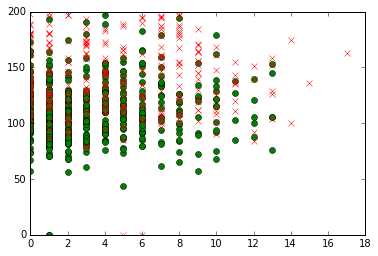

In [16]:
pl.ion()
pl.plot(pima[indices0,0],pima[indices0,1],'go')
pl.plot(pima[indices1,0],pima[indices1,1],'rx')
#pl.show()

In [17]:
p = pcn_logic_eq.pcn(pima[:,:8],pima[:,8:9])
p.pcntrain(pima[:,:8],pima[:,8:9],0.25,100)
p.confmat(pima[:,:8],pima[:,8:9])

[[ 198.   47.]
 [ 302.  221.]]
0.545572916667


The accuracy is only 54.55%! Only slightly better than random guessing.

In [18]:
trainin = pima[::2,:8]
testin = pima[1::2,:8]
traintgt = pima[::2,8:9]
testtgt = pima[1::2,8:9]